#### <span style="color:orange"> Data Preporcessing and Exploratory Data Analysis-improved/reviewed

  
The data has been uploaded and pre-processed to ensure that it is cleaned,formatted and outliers are addressed before exploring relationships between variables and analyzing correlations. 

1.	**Column Names:**  Rename columns to have clear, short and lowercase names.
2.	**Data Types:**    assign / Convert the data type of ech column to appropriate ones.
3.	**Duplicate Rows:** Identify and drop duplicate rows.1635 duplicates found
4.	**Missing Values:** Check for missing values and handle them appropriately. No missing value found
5.  **Aggregation of  feature categories** to fewer levels: Age, Education and Income
6.  **Frequency distribution** of the target/outcome variable, diabetes
7.  **Outliers:**  Detect, vizualize and remove outliers.
8.	**Histograms:** Plot histograms to visualize the distribution of numeric features.
9.	**Scatter Plot/Bar Plot:**  Plot scatter plots or bar plots to explore relationships between variables.
10. **Summary Statistics:**  Calculate summary statistics for numeric features.
11. **Correlation Matrix/Heat Map:**  Calculate and visualize the correlation between numeric features
12. **Chi-square test** for independence  of categorical variables against 'diabetes'
13.	**Frequency distribution** categorical variables

#### <span style="color:orange">Import necessary libraries

In [243]:
## IMPORT NECESSARY PYTHON LIBRARIES

import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import scipy.stats as stats 

#### <span style="color:orange">Read the diabetes dataset

In [270]:
diabetes_raw = pd.read_csv("C:/Users/yitay/Documents/CIND820/diabetes_prediction/Initial result and Codes/diabetes_raw.csv", sep=',')

In [245]:
# see the first 5 observations
diabetes_raw.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


#### <span style="color:orange"> 1. Rename column names with short and lowercase names

In [271]:
# lowercase, shorter column names
new_column_names = ['diabetes', 'bp', 'chol', 'cholcheck', 'bmi', 'smoker', 'stroke', 'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol', 'healthcare', 'nodocbccost', 'genhlth', 'menthlth', 'phyhlth', 'walk', 'sex', 'age',
'education', 'income']
diabetes_raw.columns = new_column_names

In [272]:
# Inspect the first 5 rows after renaming the columns
diabetes_raw.head()

,diabetes,bp,chol,cholcheck,bmi,smoker,stroke,heart_disease,activity,fruits,...,healthcare,nodocbccost,genhlth,menthlth,phyhlth,walk,sex,age,education,income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


##### <span style="color:orange">  Check the data structure (rows and columns)

In [273]:
# (row, columns)
print(diabetes_raw.shape)
print("Number of rows:", diabetes_raw.shape[0])      # 0 for rows
print("Number of columns:", diabetes_raw.shape[1])   # 1 for columns

(70692, 22)
Number of rows: 70692
Number of columns: 22


#### <span style="color:orange"> Count the number of unique values for each column

In [249]:
# Dictionary to store the count of unique values for each column
unique_counts = {}

# Loop through each column and get the count of unique values
for column in diabetes_raw.columns:
    unique_counts[column] = diabetes_raw[column].nunique()

# Print the number of unique values for each column
for column, count in unique_counts.items():
    print(f"Number of unique values - '{column}': {count}")

Number of unique values - 'diabetes': 2
Number of unique values - 'bp': 2
Number of unique values - 'chol': 2
Number of unique values - 'cholcheck': 2
Number of unique values - 'bmi': 80
Number of unique values - 'smoker': 2
Number of unique values - 'stroke': 2
Number of unique values - 'heart_disease': 2
Number of unique values - 'activity': 2
Number of unique values - 'fruits': 2
Number of unique values - 'veggies': 2
Number of unique values - 'alcohol': 2
Number of unique values - 'healthcare': 2
Number of unique values - 'nodocbccost': 2
Number of unique values - 'genhlth': 5
Number of unique values - 'menthlth': 31
Number of unique values - 'phyhlth': 31
Number of unique values - 'walk': 2
Number of unique values - 'sex': 2
Number of unique values - 'age': 13
Number of unique values - 'education': 6
Number of unique values - 'income': 8


### <span style="color:orange">  Check data types of attributes

In [250]:
# check the data type of attributes
print("Data Types of Attributes:")
diabetes_raw.dtypes

Data Types of Attributes:


diabetes         float64
bp               float64
chol             float64
cholcheck        float64
bmi              float64
smoker           float64
stroke           float64
heart_disease    float64
activity         float64
fruits           float64
veggies          float64
alcohol          float64
healthcare       float64
nodocbccost      float64
genhlth          float64
menthlth         float64
phyhlth          float64
walk             float64
sex              float64
age              float64
education        float64
income           float64
dtype: object

#### <span style="color:orange"> Convert categorical and binary features from float to integer data type
As shown above, the data type of categorical and/or binary features is float64. converting a float column to an Integer column allow a straightforward logical operations of categorical and binary features. Moreover, these conversions truncate decimal places, potentially affecting calculations. 

In [274]:
# List of categorica/binary features /columns to be converted to integer
float_to_integer = ['diabetes', 'bp', 'chol', 'cholcheck', 'smoker', 'stroke', 'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol', 'healthcare', 'nodocbccost', 'genhlth','menthlth','phyhlth', 'walk', 'sex', 'age', 'education', 'income']

# Convert the specified columns to integer dtype
for column in float_to_integer:
    # Fill NaN values with 0 and convert to integer
    diabetes_raw[column] = diabetes_raw[column].astype(int)

# Check the data types
print(diabetes_raw.dtypes)

diabetes           int32
bp                 int32
chol               int32
cholcheck          int32
bmi              float64
smoker             int32
stroke             int32
heart_disease      int32
activity           int32
fruits             int32
veggies            int32
alcohol            int32
healthcare         int32
nodocbccost        int32
genhlth            int32
menthlth           int32
phyhlth            int32
walk               int32
sex                int32
age                int32
education          int32
income             int32
dtype: object


##### <span style="color:orange"> 3. Duplicate Rows:  Identify and drop duplicate rows
- 1635 duplicate rows found

In [275]:
# Check for duplicate rows
duplicate_rows = diabetes_raw[diabetes_raw.duplicated()]

# Print the duplicate rows
if not duplicate_rows.empty:
    print("Duplicate rows found:")
    print(len(duplicate_rows))
   #print(duplicate_rows)
else:
    print("No duplicate rows found.")

Duplicate rows found:
1635


### Drop duplicate rows and update the dataframe to reflect the chnages
- Assign the result of drop_duplicates back to the original DataFrame.

In [276]:
# Drop duplicates, keeping the first occurrence
diabetes_raw = diabetes_raw.drop_duplicates(keep='first')

# check the number of rows and clumns after droping the duplicates
print(diabetes_raw.shape)

(69057, 22)


#### <span style="color:orange"> 4.	Missing Values:  Identify and handle missing values.
 - <span style="color:orange">No missing value found

In [277]:
# Count the number of missing values in each column
missing_count_per_column = diabetes_raw.isnull().sum()
missing_count_per_column

diabetes         0
bp               0
chol             0
cholcheck        0
bmi              0
smoker           0
stroke           0
heart_disease    0
activity         0
fruits           0
veggies          0
alcohol          0
healthcare       0
nodocbccost      0
genhlth          0
menthlth         0
phyhlth          0
walk             0
sex              0
age              0
education        0
income           0
dtype: int64

In [256]:
## Count the total number of missing values in the entire DataFrame
total_missing_count = diabetes_raw.isnull().sum().sum()
print("Total number of missing values:",total_missing_count)

Total number of missing values: 0


####  <span style="color:orange">Convert 'genhlth', 'age', 'education' and 'income' columns to categorical data typs

In [278]:
# Convert columns to categorical data type
diabetes_raw['genhlth'] = diabetes_raw['genhlth'].astype('category')
diabetes_raw['age'] = diabetes_raw['age'].astype('category')
diabetes_raw['income'] = diabetes_raw['income'].astype('category')
diabetes_raw['education'] = diabetes_raw['education'].astype('category')

In [279]:
# Print the data types to verify they are categorical
print("\nData types of the columns:")
print(diabetes_raw.dtypes)


Data types of the columns:
diabetes            int32
bp                  int32
chol                int32
cholcheck           int32
bmi               float64
smoker              int32
stroke              int32
heart_disease       int32
activity            int32
fruits              int32
veggies             int32
alcohol             int32
healthcare          int32
nodocbccost         int32
genhlth          category
menthlth            int32
phyhlth             int32
walk                int32
sex                 int32
age              category
education        category
income           category
dtype: object


##### <span style="color:orange"> 5. Aggregation of  feature categories to fewer levels: Age, Education and Income

#####  <span style="color:orange">genHlth- General Health
The aggeneral health category levels have been reduced  from 5 to 3.  Levels 1 and 2 assigned to level 0 (young adults); 3 to 6 to level 1 (middle aged),7 to 9 to level 2 (older adults) and 10 to 13 to level 3 (elderly)

In [280]:
genhlth_mapping = {
   	1: 0, # Levels 1  map to 0 (excellent)
    2: 1,
    3: 1, # Levels 2 and 3 map to 1 (good)
    4: 1,
    5: 2, # Levels 4 and 5 map to 2 (poor)
    6: 2
}
## Replace the 'genhlth' levels in the DataFrame
diabetes_raw['genhlth'] = diabetes_raw['genhlth'].map(genhlth_mapping)

## Rename the general health levels to excellent, good, and poor
diabetes_raw['genhlth'] = diabetes_raw['genhlth'].replace({0: 'excellent', 1: 'good', 2: 'poor'})
## Now, 'genhlth' column will have levels 'excellent', 'good', & 'poor'

##  We can skip the renaming step if we prefer using numerical values instead of strings.

In [281]:
# Get unique levels of the 'genhlth' column
new_genhlth_levels = diabetes_raw['genhlth'].unique()

# Print each unique level in a new line
print("New levels in 'genhlth' column:")
for level in new_genhlth_levels:
    print('-',level)

New levels in 'genhlth' column:
- good
- excellent
- poor


#####  <span style="color:orange"> Age
The age category levels have been reduced  from 13 to 4.  Levels 1 and 2 assigned to level 0 (young adults); 3 to 6 to level 1 (middle aged),7 to 9 to level 2 (older adults) and 10 to 13 to level 3 (elderly)

In [282]:
# Define age mapping: maps original age levels to new categorical levels
age_mapping = {
    1: 0,   # Levels 1 & 2 map to 0 (Young Adults)
    2: 0,
    3: 1,   # Levels 3 - 6 map to 1 (Middle Aged)
    4: 1,
    5: 1,
    6: 1,
    7: 2,   # Levels 7 - 9 map to 2 (Older Adults)
    8: 2,
    9: 2,
    10: 3,   # Levels 10 – 13 map to 3 (Elderly)
    11: 3,
    12: 3,
    13: 3
}

## Replace the age levels in the DataFrame
diabetes_raw['age'] = diabetes_raw['age'].map(age_mapping)

## Note that we can rename the age levels to Young Adults, Middle Aged, Older Adults, and Elderly as follows
diabetes_raw['age'] = diabetes_raw['age'].replace({0: 'Young Adults', 1: 'Middle Aged', 2: 'Older Adults', 3: 'Elderly'})
## Now, 'age' column will have levels 'Young Adults', 'Middle Aged', 'Older Adults', and 'Elderly'

##  We can skip the renaming step if we prefer using numerical values instead of strings.


In [283]:
# Get unique levels of the 'age' column
new_age_levels = diabetes_raw['age'].unique()

# Print each unique level in a new line
print("New levels in 'age' column:")
for level in new_age_levels:
    print('-',level)

New levels in 'age' column:
- Middle Aged
- Elderly
- Older Adults
- Young Adults


##### <span style="color:orange"> Education
The  education levels have been reduced  from 6 to 3.  Levels 1 and 2 assigned to level 0 (Elementary); 3 and 4 to level 1 (High school), 5 and 6 to level 2 (collage)

In [284]:
education_mapping = {
   	1: 0, # Levels 1 and 2 map to 0 (up to grade 8)
    2: 0,
    3: 1, # Levels 3 and 4 map to 1 (grade 9 to 12th)
    4: 1,
    5: 2, # Levels 5 and 6 map to 1 (collage or university)
    6: 2
}
## Replace the education levels in the DataFrame
diabetes_raw['education'] = diabetes_raw['education'].map(education_mapping)

## Rename the education levels to Elementary, High School and Collage
diabetes_raw['education'] = diabetes_raw['education'].replace({0: 'Elementary', 1: 'High Schhol', 2: 'Collage'})
## Now, 'Education' column will have levels 'Elementary', 'High Schhol', & 'Collage'

##  We can skip the renaming step if we prefer using numerical values instead of strings.

In [285]:
# Get unique levels of the 'education' column
new_education_levels = diabetes_raw['education'].unique()

# Print each unique level in a new line
print("New levels in 'education' column:")
for level in new_education_levels:
    print('-',level)

New levels in 'education' column:
- Collage
- High Schhol
- Elementary


##### <span style="color:orange">Income
The  income levels have been reduced  from 8 to 3.  Levels 1 to 5 assigned to level 0 (Low income); 6 and 7 to level 1 (Middle income), 8 to level 2 (High income)

In [286]:
income_mapping = {
   	1: 0,  # Levels 1 and 5 map to 0 (low income)
    2: 0,
    3: 0,   
    4: 0,
    5: 0,
    6: 1,  # Levels 6 and 7  map to 1 (middle income)
    7: 1,   
    8: 2   # Levels 8 map to 2 (high income)
}

## Then replace the income levels in the DataFrame
diabetes_raw['income'] = diabetes_raw['income']. map(income_mapping)

## Finally, rename the income levels to low income, middle income, and high income
diabetes_raw['income'] = diabetes_raw['income'].replace({0: 'Low income', 1: 'Middle income', 2:'High income' })
## Now 'income' column will have levels 'low income', 'middle income', 'high income'

##  we can skip the renaming step if we prefer using numerical values instead of strings.

In [287]:
# Get unique levels of the 'education' column
new_income_levels = diabetes_raw['income'].unique()

# Print each unique level in a new line
print("new levels in 'income' column:")
for level in new_income_levels:
    print('-',level)

new levels in 'income' column:
- High income
- Middle income
- Low income


### Binning (Discretization) of the data in 'menthlth' and 'phyHlth' columns in the dataframe
"Binning" or "Discretization" - is the process of transforming continuous or discrete numerical data into categorical data by grouping values into intervals or bins.

- Using pd.cut with right=False, the intervals are:

- [0, 5): includes values from 0 up to but not including 5.
- [5, 15): includes values from 5 up to but not including 15.
- [15, 31): includes values from 15 up to but not including 31.
  
Here, right=False means the upper bound is exclusive.

### menthlth

In [330]:
# Define the categories and their corresponding labels for menhlth
bins = [0, 5, 15, 32]
labels = ['Excellent', 'Good', 'Poor']

# Apply the pd.cut function to create a new column with the categories
diabetes_raw['menthlth_cat'] = pd.cut(diabetes_raw['menthlth'], bins=bins, labels=labels, right=False)

In [332]:
# Print the first 5 rows of the updated DataFrame

diabetes_raw.head()

,diabetes,bp,chol,cholcheck,bmi,smoker,stroke,heart_disease,activity,fruits,...,genhlth,menthlth,phyhlth,walk,sex,age,education,income,menthlth_cat,phyhlth_cat
0,0,1,0,1,0.552109,0,0,0,1,0,...,good,5,30,0,1,Middle Aged,Collage,High income,Good,Poor
1,0,1,1,1,0.552109,1,1,0,0,1,...,good,0,0,0,1,Elderly,Collage,High income,Excellent,Excellent
2,0,0,0,1,0.552109,0,0,0,1,1,...,excellent,0,10,0,1,Elderly,Collage,High income,Excellent,Good
3,0,1,1,1,0.612179,1,0,0,1,1,...,good,0,3,0,1,Elderly,Collage,High income,Excellent,Excellent
4,0,0,0,1,0.640678,1,0,0,1,1,...,good,0,0,0,0,Older Adults,Collage,High income,Excellent,Excellent


### phyHlth

In [333]:
# Define the categories and their corresponding labels for phyhlth
bins = [0, 5, 15, 32]
labels = ['Excellent', 'Good', 'Poor']

# Apply the pd.cut function to create a new column with the categories
diabetes_raw['phyhlth_cat'] = pd.cut(diabetes_raw['phyhlth'], bins=bins, labels=labels, right=False)

In [334]:
# Print the first 5 rows of the updated DataFrame
diabetes_raw.head()

,diabetes,bp,chol,cholcheck,bmi,smoker,stroke,heart_disease,activity,fruits,...,genhlth,menthlth,phyhlth,walk,sex,age,education,income,menthlth_cat,phyhlth_cat
0,0,1,0,1,0.552109,0,0,0,1,0,...,good,5,30,0,1,Middle Aged,Collage,High income,Good,Poor
1,0,1,1,1,0.552109,1,1,0,0,1,...,good,0,0,0,1,Elderly,Collage,High income,Excellent,Excellent
2,0,0,0,1,0.552109,0,0,0,1,1,...,excellent,0,10,0,1,Elderly,Collage,High income,Excellent,Good
3,0,1,1,1,0.612179,1,0,0,1,1,...,good,0,3,0,1,Elderly,Collage,High income,Excellent,Excellent
4,0,0,0,1,0.640678,1,0,0,1,1,...,good,0,0,0,0,Older Adults,Collage,High income,Excellent,Excellent


In [335]:
menthlth_cat_freq = diabetes_raw['menthlth_cat'].value_counts()

# Display the class frequencies
print(menthlth_cat_freq)

menthlth_cat
Excellent    53342
Poor          7529
Good          6005
Name: count, dtype: int64


In [336]:
phyhlth_cat_freq = diabetes_raw['phyhlth_cat'].value_counts()

# Display the class frequencies
print(phyhlth_cat_freq)

phyhlth_cat
Excellent    48087
Poor         11669
Good          7120
Name: count, dtype: int64


In [295]:
print(diabetes_raw.dtypes)

diabetes            int32
bp                  int32
chol                int32
cholcheck           int32
bmi               float64
smoker              int32
stroke              int32
heart_disease       int32
activity            int32
fruits              int32
veggies             int32
alcohol             int32
healthcare          int32
nodocbccost         int32
genhlth            object
menthlth            int32
phyhlth             int32
walk                int32
sex                 int32
age                object
education          object
income             object
menthlth_cat     category
phyhlth_cat      category
dtype: object


In [337]:
diabetes_raw.head()

,diabetes,bp,chol,cholcheck,bmi,smoker,stroke,heart_disease,activity,fruits,...,genhlth,menthlth,phyhlth,walk,sex,age,education,income,menthlth_cat,phyhlth_cat
0,0,1,0,1,0.552109,0,0,0,1,0,...,good,5,30,0,1,Middle Aged,Collage,High income,Good,Poor
1,0,1,1,1,0.552109,1,1,0,0,1,...,good,0,0,0,1,Elderly,Collage,High income,Excellent,Excellent
2,0,0,0,1,0.552109,0,0,0,1,1,...,excellent,0,10,0,1,Elderly,Collage,High income,Excellent,Good
3,0,1,1,1,0.612179,1,0,0,1,1,...,good,0,3,0,1,Elderly,Collage,High income,Excellent,Excellent
4,0,0,0,1,0.640678,1,0,0,1,1,...,good,0,0,0,0,Older Adults,Collage,High income,Excellent,Excellent


#### <span style="color:orange"> 6. Frequency distribution of the target/outcome variable, diabetes

In [338]:
import pandas as pd
class_diabetes = diabetes_raw['diabetes'].value_counts()

# Display the class frequencies
print("class diabetes:")
print(class_diabetes)

class diabetes:
diabetes
0    33473
1    33403
Name: count, dtype: int64


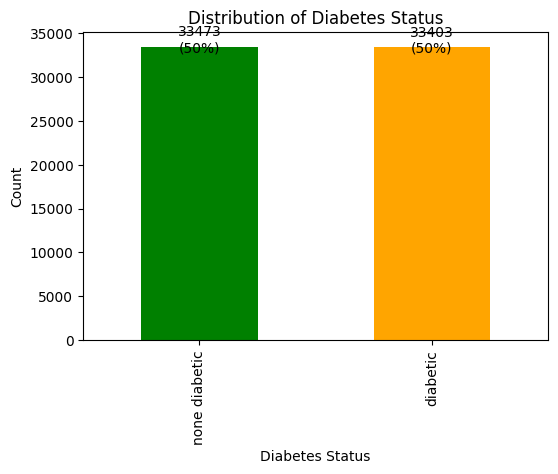

In [339]:
# Plot the value counts of the 'diabetes' column
ax = diabetes_raw['diabetes'].value_counts().plot(kind='bar', figsize=(6, 4), color=['green', 'orange'])
plt.title('Distribution of Diabetes Status')
plt.xlabel('Diabetes Status')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['none diabetic', 'diabetic'])

# Annotate count and percentage on top of each bar
total_count = len(diabetes_raw['diabetes'])
for p in ax.patches:
    count = int(p.get_height())
    percentage = (count / total_count) * 100
    ax.annotate(f'{count}\n({percentage:.0f}%)', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, xytext=(0, 5), 
                textcoords='offset points', color='black')

plt.show()

#### <span style="color:orange"> 7.	Outliers:  Detect, vizualize and remove outliers.

The lower and upper boundaries beyond which data points are considered outliers are given as follows

    - Lower Bound = Q1 − 1.5*IQR  
    - Upper Bound = Q3 + 1.5*IQR

##### <span style="color:orange"> Detect outliers using IQR and count them by features

In [299]:
import pandas as pd

# Function to detect outliers using IQR and count them by feature
def detect_outliers_iqr(diabetes_raw, columns_with_outliers):
    outliers_count = {col: 0 for col in columns_with_outliers}
    
    for col in columns_with_outliers:
        q1 = diabetes_raw[col].quantile(0.25)
        q3 = diabetes_raw[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        for val in diabetes_raw[col]:
            if val < lower_bound or val > upper_bound:
                outliers_count[col] += 1
                
    return outliers_count

columns_with_outliers = ['bmi']
outliers_count = detect_outliers_iqr(diabetes_raw, columns_with_outliers)

# Create a DataFrame to tabulate the number of outliers by feature
outliers_count_df = pd.DataFrame(list(outliers_count.items()), columns=['Feature', 'Number of Outliers'])

print("\nNumber of outliers by feature:")
print(outliers_count_df)



Number of outliers by feature:
  Feature  Number of Outliers
0     bmi                2181


#### <span style="color:orange"> 7.2.Vizualize Outliers using Box Plots

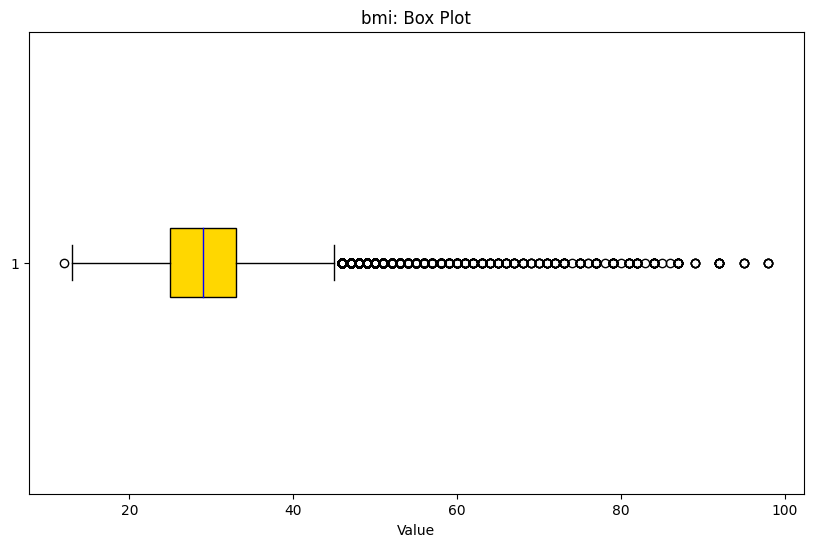

In [300]:
# List of features to plot
columns_with_outliers = ['bmi']

# Loop through each feature and create a box plot
for feature in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    
    # Create box plot
    plt.boxplot(diabetes_raw[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='gold', color='black'), medianprops=dict(color='blue'))

    # Add labels and title
    plt.xlabel('Value')
    plt.title(f'{feature}: Box Plot')

    # Show the plot
    plt.show()

#### <span style="color:orange"> 7.3. Detect and drop outliers from the dataframe

- Drop the outliers using the indices of the outliers obtained from the detect_outliers_iqr function

In [304]:
# Function to detect outliers using IQR for specified columns
def detect_outliers_iqr(df, columns):
    outliers_indices = set()
    for col in columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)].index
        outliers_indices.update(outliers)
    return list(outliers_indices)

columns_with_outliers = ['bmi']
outliers_indices = detect_outliers_iqr(diabetes_raw, columns_with_outliers)

# Drop outliers from the DataFrame
diabetes_raw = diabetes_raw.drop(outliers_indices)

# Print the first 5 rows of the cleaned DataFrame
print(diabetes_raw.head())

   diabetes  bp  chol  cholcheck   bmi  smoker  stroke  heart_disease  \
0         0   1     0          1  26.0       0       0              0   
1         0   1     1          1  26.0       1       1              0   
2         0   0     0          1  26.0       0       0              0   
3         0   1     1          1  28.0       1       0              0   
4         0   0     0          1  29.0       1       0              0   

   activity  fruits  ...    genhlth  menthlth  phyhlth  walk sex  \
0         1       0  ...       good         5       30     0   1   
1         0       1  ...       good         0        0     0   1   
2         1       1  ...  excellent         0       10     0   1   
3         1       1  ...       good         0        3     0   1   
4         1       1  ...       good         0        0     0   0   

            age  education       income  menthlth_cat phyhlth_cat  
0   Middle Aged    Collage  High income          Good         NaN  
1       Elderly 

In [309]:
# Check the number of rows
print(diabetes_raw.shape)

(66876, 24)


#### <span style="color:orange"> Box plot-After Droping Outliers

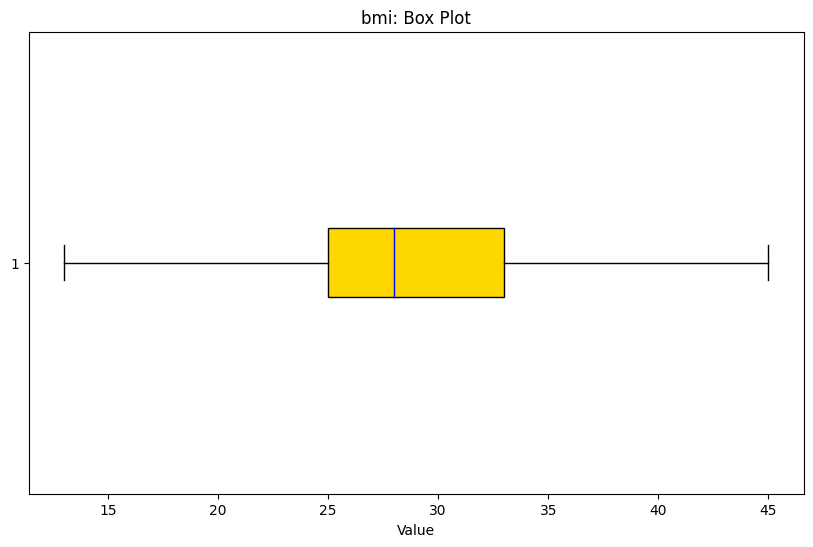

In [308]:
# List of features to plot
columns_with_outliers = ['bmi']

# Loop through each feature and create a box plot
for feature in columns_with_outliers:
    plt.figure(figsize=(10, 6))
    
    # Create box plot
    plt.boxplot(diabetes_raw[feature], vert=False, patch_artist=True, boxprops=dict(facecolor='gold', color='black'), medianprops=dict(color='blue'))

    # Add labels and title
    plt.xlabel('Value')
    plt.title(f'{feature}: Box Plot')

    # Show the plot
    plt.show()

#### <span style="color:orange"> 8.Histogram- numerical features

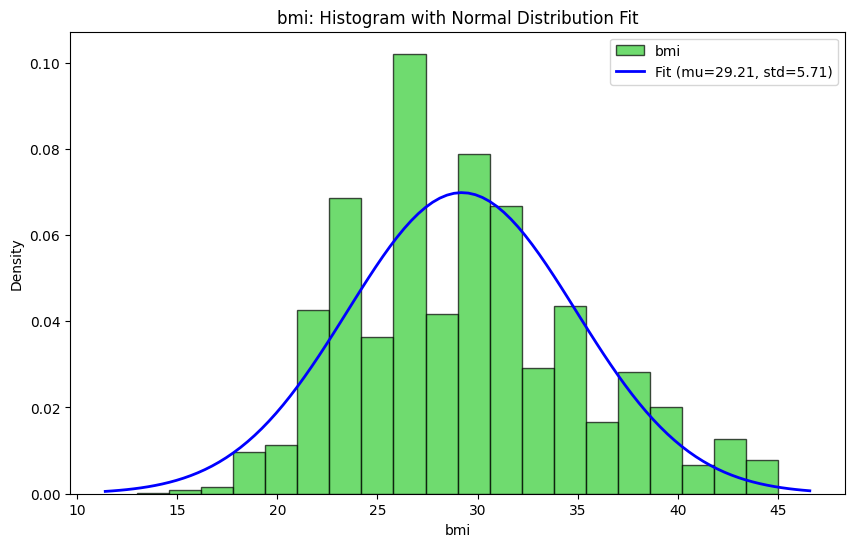

In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# List of features to plot
features = ['bmi']

# Loop through each feature and create histogram with normal distribution fit
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    plt.hist(diabetes_raw[feature], bins=20, color='limegreen', edgecolor='black', alpha=0.7, density=True, label=feature)

    # Fit a normal distribution to the data
    mu, std = norm.fit(diabetes_raw[feature])

    # Overlay normal distribution curve
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_range, mu, std)

    plt.plot(x_range, p, 'blue', linewidth=2, label=f'Fit (mu={mu:.2f}, std={std:.2f})')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'{feature}: Histogram with Normal Distribution Fit')
    plt.legend()

    # Show the plot
    plt.show()


### <span style="color:orange"> 9.	Scatter Plot/Bar Plot: used to explore relationships between variables.

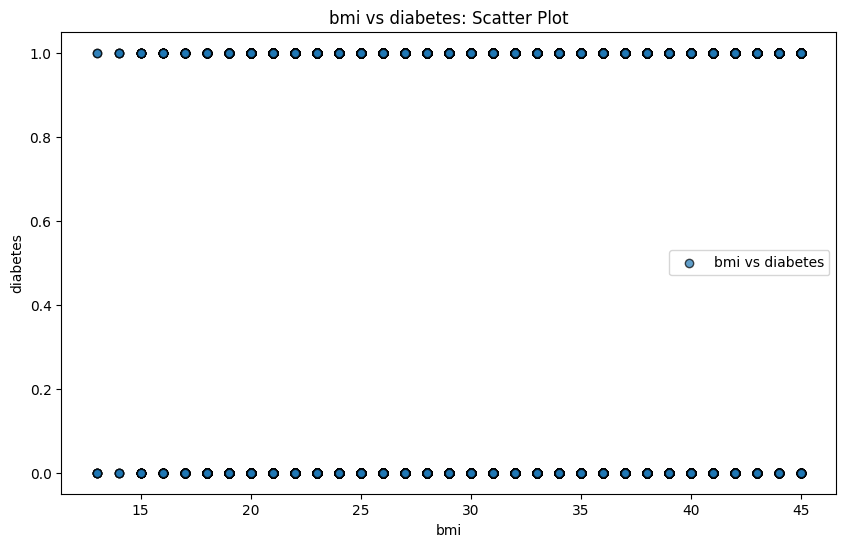

In [311]:
# List of features to plot
features = ['bmi']

# Target variable
target = 'diabetes'

# Loop through each feature and create a scatter plot
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create scatter plot
    plt.scatter(diabetes_raw[feature], diabetes_raw[target], alpha=0.7, edgecolor='black', label=f'{feature} vs {target}')
    
    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.title(f'{feature} vs {target}: Scatter Plot')
    plt.legend()

    # Show the plot
    plt.show()

### Log transformation of Numeric Features

In [312]:
# Log transformation for 'bmi'
diabetes_raw['bmi'] = np.log1p(diabetes_raw['bmi'])

### plot the Histogrms after log transformation of of 'bmi'

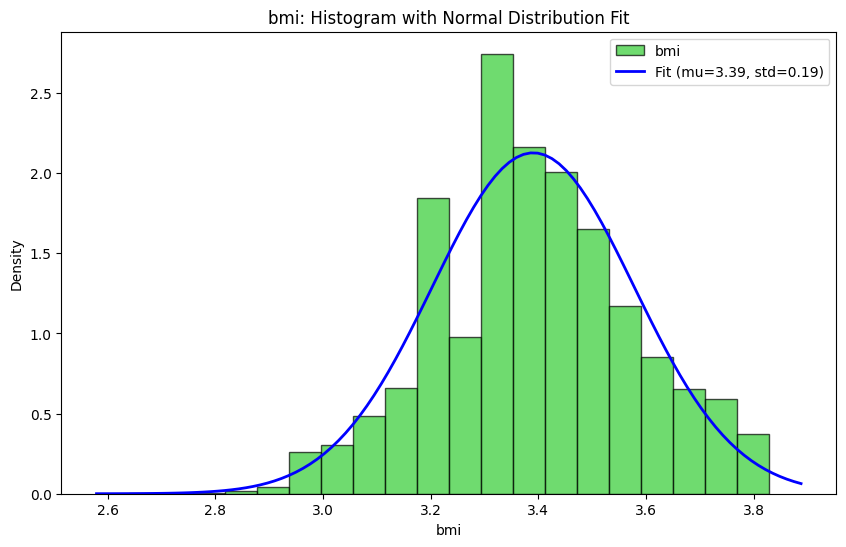

In [313]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm


# List of features to plot
features = ['bmi']

# Loop through each feature and create histogram with normal distribution fit
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    plt.hist(diabetes_raw[feature], bins=20, color='limegreen', edgecolor='black', alpha=0.7, density=True, label=feature)

    # Fit a normal distribution to the data
    mu, std = norm.fit(diabetes_raw[feature])

    # Overlay normal distribution curve
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_range, mu, std)

    plt.plot(x_range, p, 'blue', linewidth=2, label=f'Fit (mu={mu:.2f}, std={std:.2f})')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'{feature}: Histogram with Normal Distribution Fit')
    plt.legend()

    # Show the plot
    plt.show()

###  Min-Max scaling of Numeric features: 'bmi' 
 
 Min-Max scaling transforms the values of features to a specific range (typically between 0 and 1), which can be useful for algorithms that require all input features to be on the same scale. This approach ensures that all specified features are scaled uniformly, facilitating better performance for various machine learning algorithms and analysis techniques.


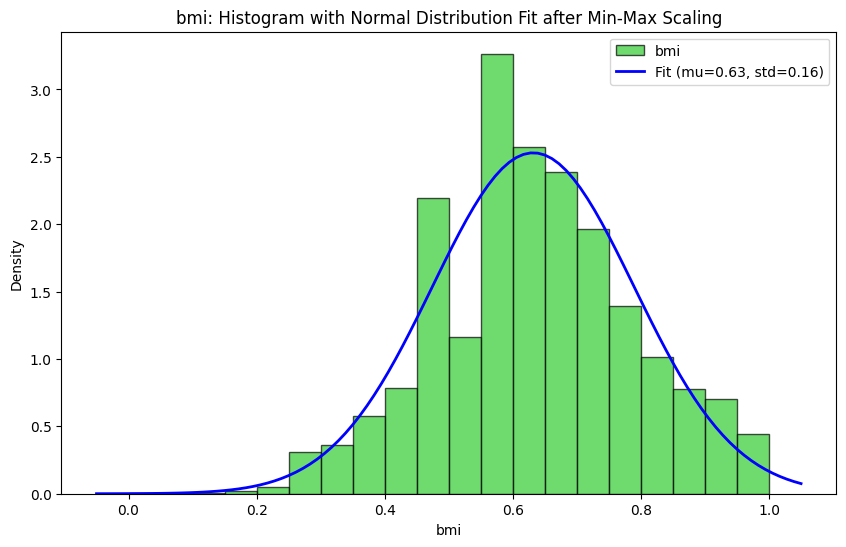

In [314]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import norm

# List of features to normalize
features = ['bmi']

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Perform Min-Max scaling on each feature
diabetes_raw[features] = scaler.fit_transform(diabetes_raw[features])

# Loop through each feature and create histogram with normal distribution fit
for feature in features:
    plt.figure(figsize=(10, 6))
    
    # Create histogram
    plt.hist(diabetes_raw[feature], bins=20, color='limegreen', edgecolor='black', alpha=0.7, density=True, label=feature)

    # Fit a normal distribution to the data
    mu, std = norm.fit(diabetes_raw[feature])

    # Overlay normal distribution curve
    xmin, xmax = plt.xlim()
    x_range = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x_range, mu, std)

    plt.plot(x_range, p, 'blue', linewidth=2, label=f'Fit (mu={mu:.2f}, std={std:.2f})')

    # Add labels and title
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.title(f'{feature}: Histogram with Normal Distribution Fit after Min-Max Scaling')
    plt.legend()

    # Show the plot
    plt.show()


#### <span style="color:orange"> 10.	Summary Statistics: numeric features.

In [340]:
diabetes_raw[['bmi','menthlth', 'phyhlth']].describe()
#diabetes_clean.describe()

,bmi,menthlth,phyhlth
count,66876.000000,66876.000000,66876.000000
mean,0.631852,3.727092,5.744886
std,0.157674,8.108922,9.992401
min,0.000000,0.000000,0.000000
25%,0.520383,0.000000,0.000000
50%,0.612179,0.000000,0.000000
75%,0.745894,2.000000,5.000000
max,1.000000,30.000000,30.000000


#### <span style="color:orange">11.Correlation Matrix: 
<span style="color:orange"> Visualize the correlation between features & between features and the outcome variable(diabetes)

In [341]:
## Compute the correlation matrix including the outcome variable, 'diabetes'
#      correlation_matrix = diabetes_clean.corr()

## Compute the correlation matrix by dropping the outcome variable, 'diabetes'
#     diabetes_clean_drop_target = df_diabetes.drop(columns=['diabetes'])
#     correlation_matrix = diabetes_clean_drop_target.corr()

# Compute the correlation matrix for numeric features
numeric_features   = diabetes_raw[['diabetes','bmi', 'menthlth', 'phyhlth']]
correlation_matrix = numeric_features.corr()

# Display the correlation matrix
print(correlation_matrix)

          diabetes       bmi  menthlth   phyhlth
diabetes  1.000000  0.305345  0.073533  0.199644
bmi       0.305345  1.000000  0.067495  0.113444
menthlth  0.073533  0.067495  1.000000  0.372231
phyhlth   0.199644  0.113444  0.372231  1.000000


#### <span style="color:orange"> Correlation Heatmap

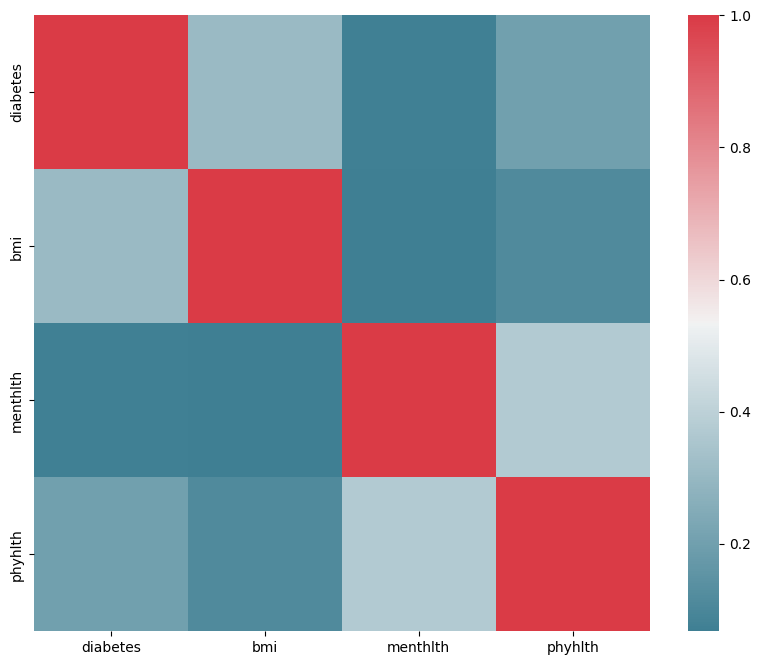

In [342]:
#import pandas as pd
#import matplotlib.pyplot as plt
#import seaborn as sns

# Run correlation matrix and plot
f, ax = plt.subplots(figsize=(10, 8))
# corr = diabetes_raw.corr()
corr =numeric_features.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

plt.show()

#### <span style="color:orange">12. Chi-square test for independence  of categorical variables against 'diabetes'

- The null hypothesis (Ho) in Chi-square test of independence states that there is no relationship between the categorical variables being tested. 
- Given a significance level of 0.05, if we reject the null hypothesis(False), it indicates that there is evidence to suggest a relationship between the variables. 

In [343]:
import pandas as pd
from scipy.stats import chi2_contingency

# List to store the results
chi2_results = []

# Define the significance level
alpha = 0.05

diabetes_raw_categories = diabetes_raw.drop(columns=['diabetes','bmi', 'menthlth','phyhlth'])

# Iterate over each column in the DataFrame
for column in diabetes_raw_categories:
    # Create a contingency table between the current column and the target column
    contingency_table = pd.crosstab(diabetes_raw[column], diabetes_raw['diabetes'])
    
    # Perform the Chi-square test
    chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)
    
    # Store the results
    chi2_results.append((column, chi2_stat, p_val, p_val > alpha))

# Convert the results to a DataFrame for easier analysis
chi2_results_df = pd.DataFrame(chi2_results, columns=['Column', 'Chi-square statistic', 'p-value', 'Null Hypothesis (Ho)'])

# Print the DataFrame
print(" Chi-square Test of Independence")

print(chi2_results_df)

 Chi-square Test of Independence
           Column  Chi-square statistic        p-value  Null Hypothesis (Ho)
0              bp           9122.164294   0.000000e+00                 False
1            chol           5279.694159   0.000000e+00                 False
2       cholcheck            924.771486  4.044620e-203                 False
3          smoker            409.103474   5.744838e-91                 False
4          stroke           1030.431046  4.362661e-226                 False
5   heart_disease           2927.441489   0.000000e+00                 False
6        activity           1374.649769  6.778352e-301                 False
7          fruits            118.018064   1.718161e-27                 False
8         veggies            337.974604   1.761853e-75                 False
9         alcohol            639.820708  3.655387e-141                 False
10     healthcare             54.900117   1.268135e-13                 False
11    nodocbccost             72.572682   1

#### <span style="color:orange"> 13. Frequency distribution diabetes by different categorical variables

Contingency Table for bp:

diabetes      0      1
bp                    
0         20702   8424
1         12771  24979




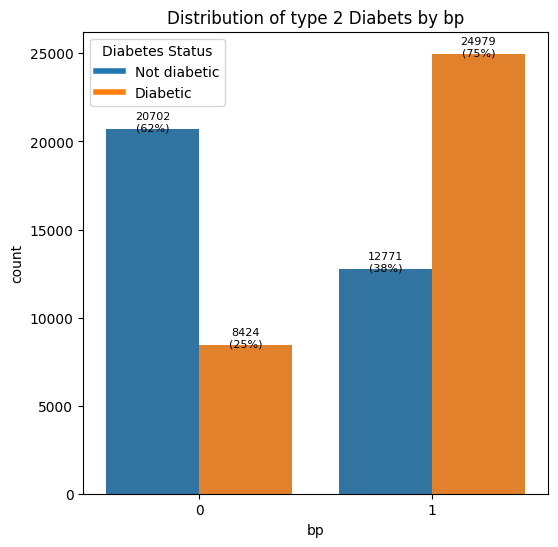

Contingency Table for chol:

diabetes      0      1
chol                  
0         20473  11059
1         13000  22344




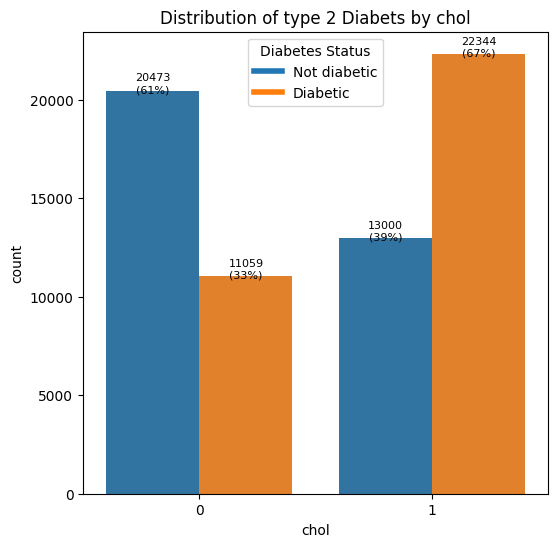

Contingency Table for cholcheck:

diabetes       0      1
cholcheck              
0           1473    231
1          32000  33172




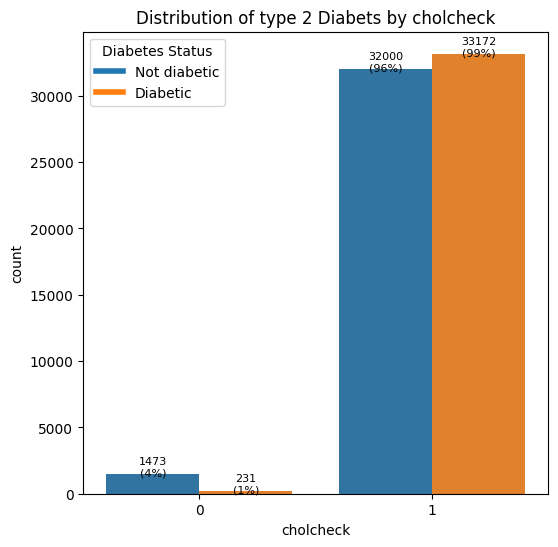

Contingency Table for smoker:

diabetes      0      1
smoker                
0         18606  15955
1         14867  17448




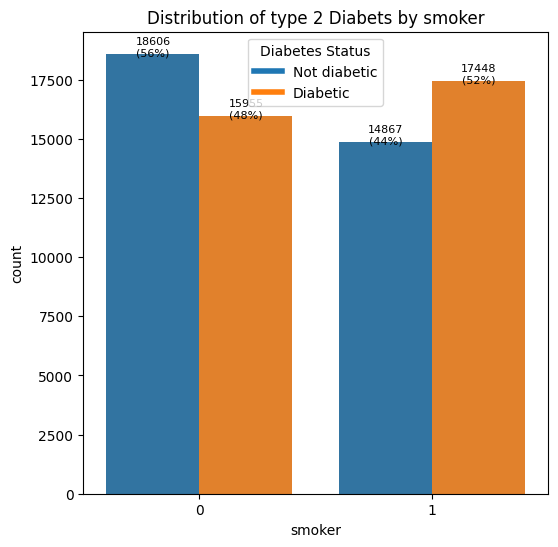

Contingency Table for stroke:

diabetes      0      1
stroke                
0         32367  30280
1          1106   3123




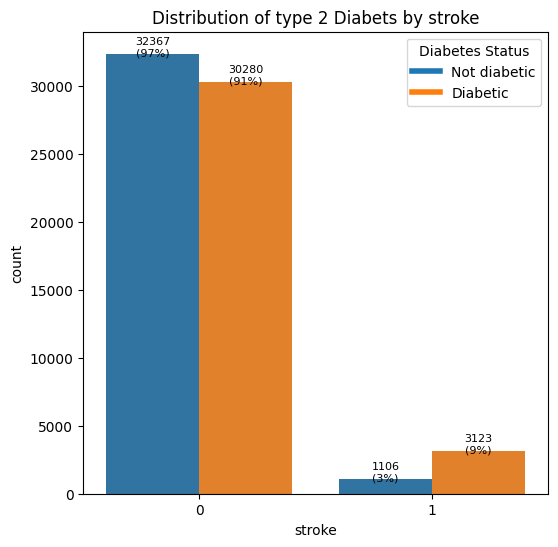

Contingency Table for heart_disease:

diabetes           0      1
heart_disease              
0              30946  25887
1               2527   7516




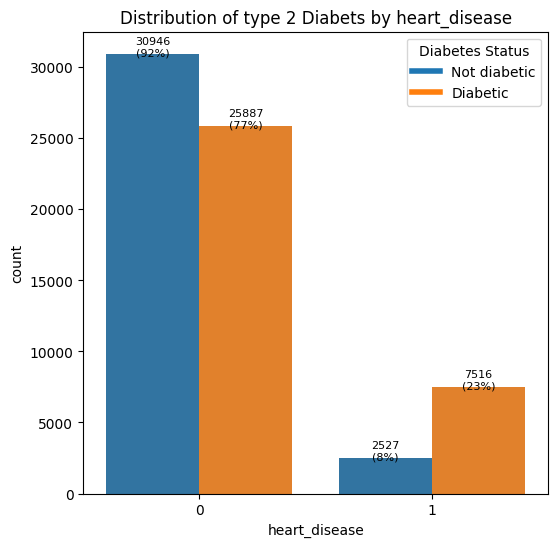

Contingency Table for activity:

diabetes      0      1
activity              
0          7718  12075
1         25755  21328




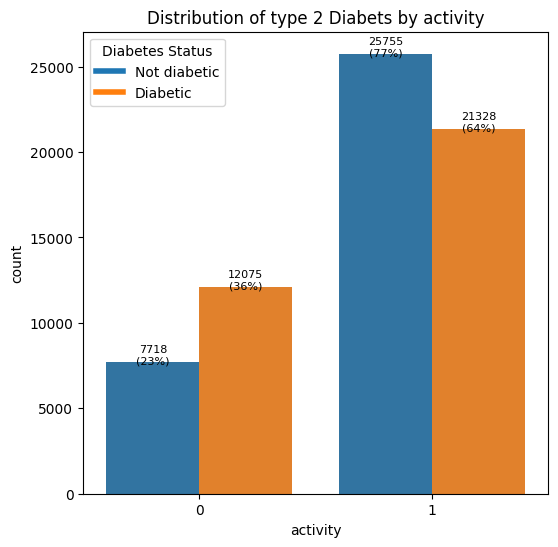

Contingency Table for fruits:

diabetes      0      1
fruits                
0         12430  13775
1         21043  19628




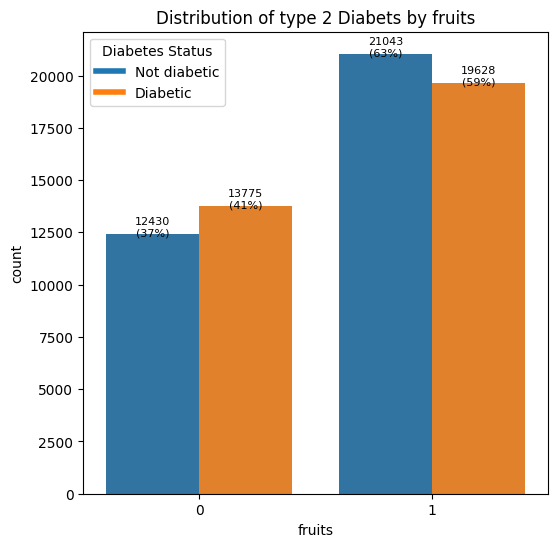

Contingency Table for veggies:

diabetes      0      1
veggies               
0          6209   8147
1         27264  25256




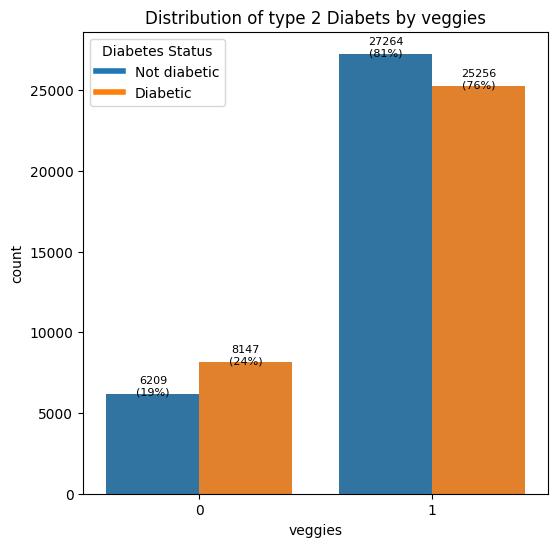

Contingency Table for alcohol:

diabetes      0      1
alcohol               
0         31314  32595
1          2159    808




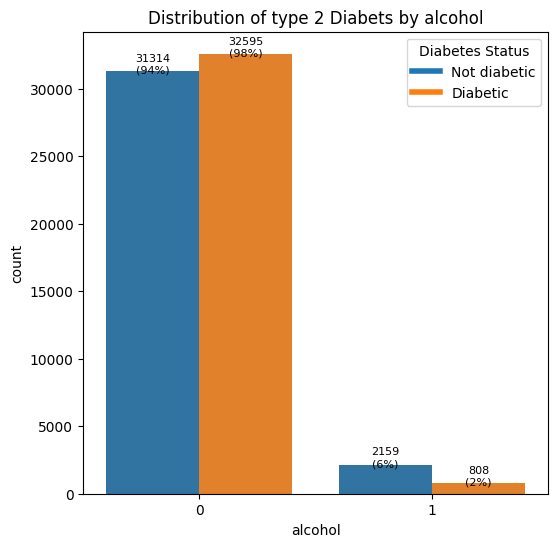

Contingency Table for healthcare:

diabetes        0      1
healthcare              
0            1719   1316
1           31754  32087




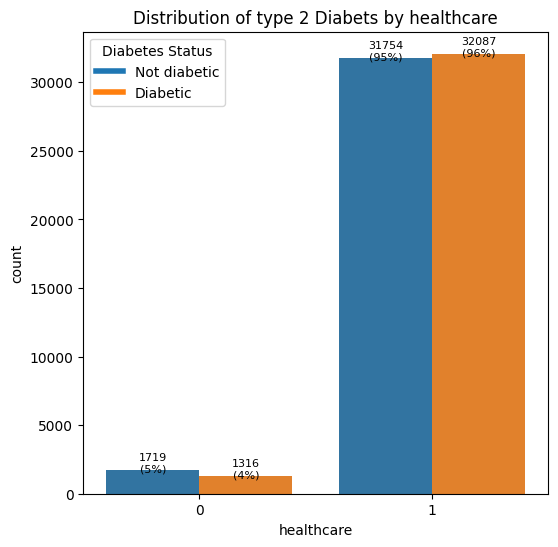

Contingency Table for nodocbccost:

diabetes         0      1
nodocbccost              
0            30652  29945
1             2821   3458




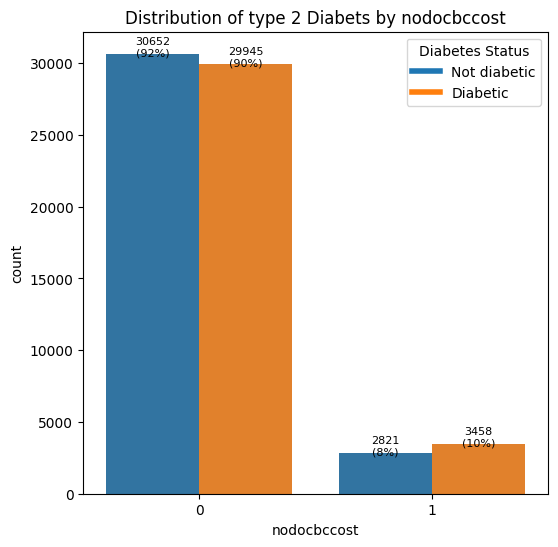

Contingency Table for genhlth:

diabetes       0      1
genhlth                
excellent   6444   1116
good       25841  28116
poor        1188   4171




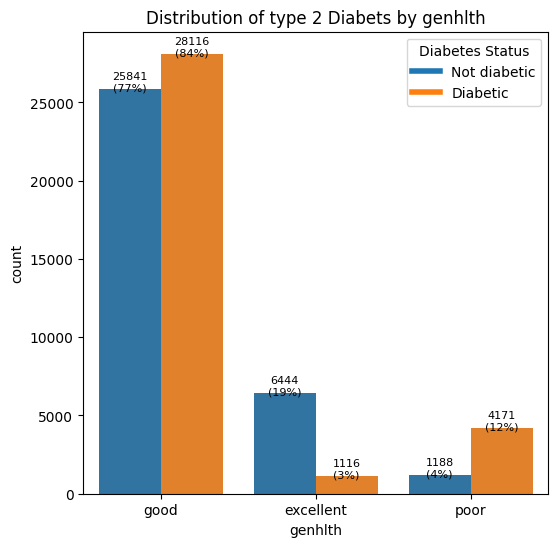

Contingency Table for walk:

diabetes      0      1
walk                  
0         28933  21448
1          4540  11955




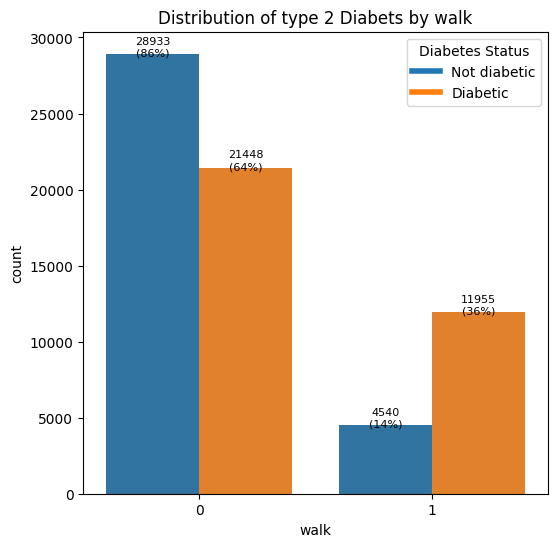

Contingency Table for sex:

diabetes      0      1
sex                   
0         18866  17187
1         14607  16216




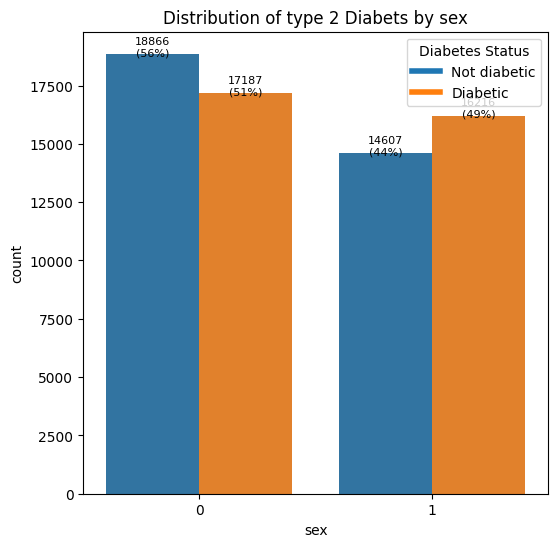

Contingency Table for age:

diabetes          0      1
age                       
Elderly       11034  17681
Middle Aged    8626   3361
Older Adults  11715  12169
Young Adults   2098    192




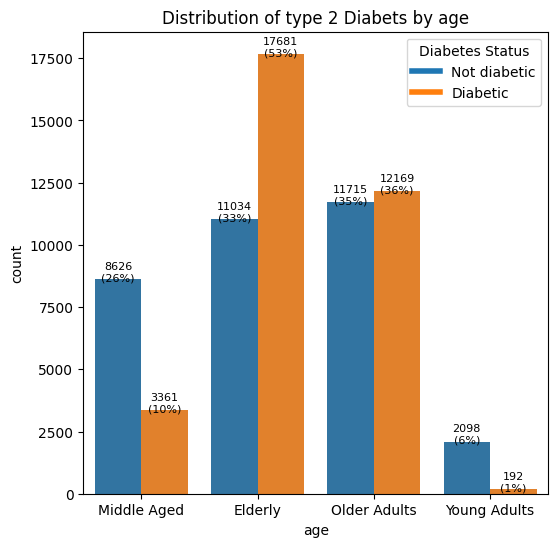

Contingency Table for education:

diabetes         0      1
education                
Collage      23633  19617
Elementary     485   1169
High Schhol   9355  12617




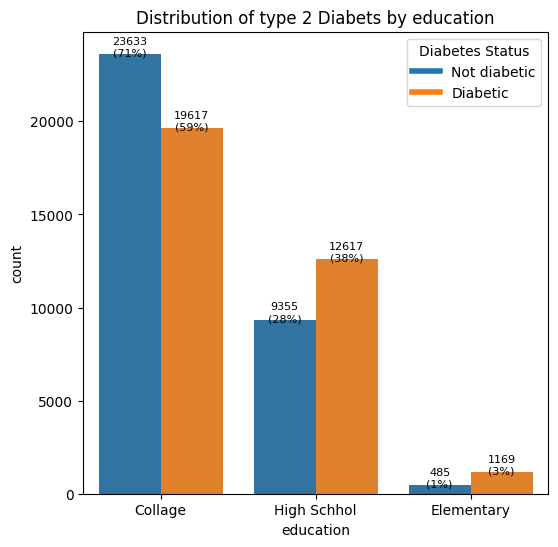

Contingency Table for income:

diabetes           0      1
income                     
High income    12156   6850
Low income     10488  16492
Middle income  10829  10061




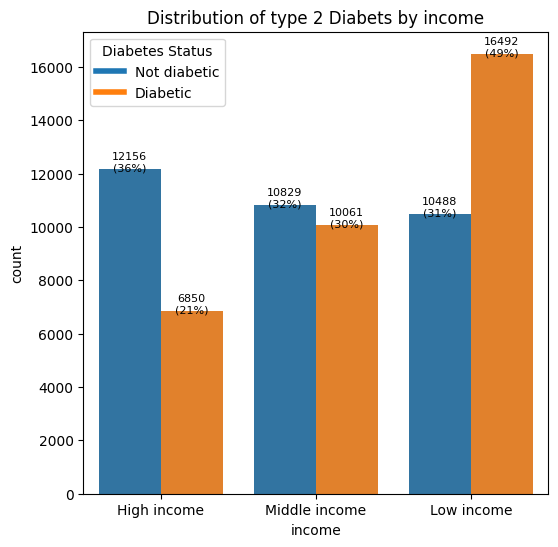

Contingency Table for menthlth_cat:

diabetes          0      1
menthlth_cat              
Excellent     27492  25850
Good           2973   3032
Poor           3008   4521




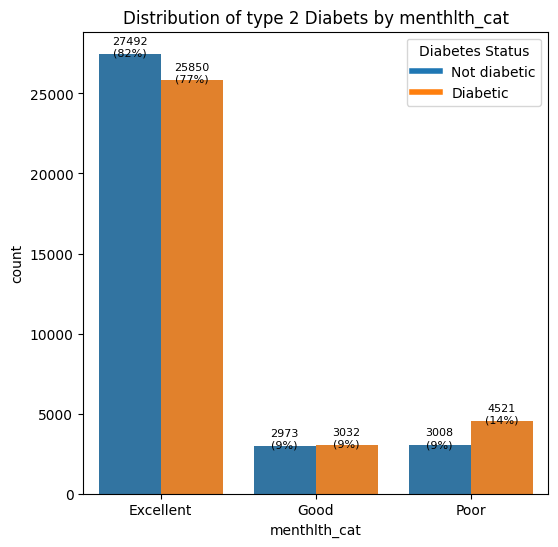

Contingency Table for phyhlth_cat:

diabetes         0      1
phyhlth_cat              
Excellent    27002  21085
Good          2938   4182
Poor          3533   8136




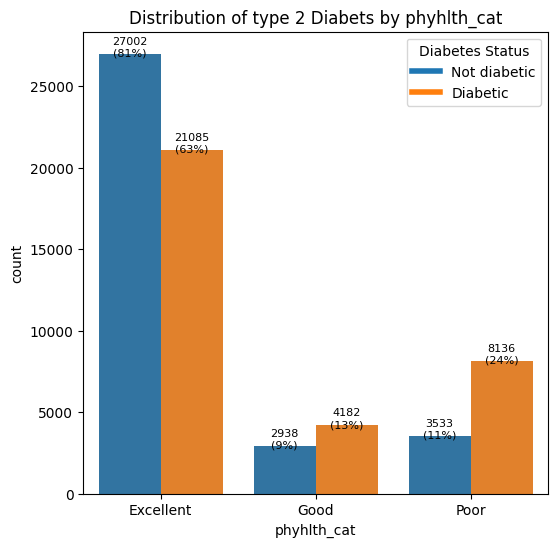

In [345]:
# List of categorical features
categorical_features = ['bp', 'chol', 'cholcheck', 'smoker', 'stroke', 'heart_disease', 'activity', 'fruits', 'veggies', 'alcohol', 'healthcare', 'nodocbccost', 'genhlth', 'walk', 'sex', 'age', 'education', 'income', 'menthlth_cat', 'phyhlth_cat']

# Analyze binary target variable by categorical features
for column in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(diabetes_raw[column], diabetes_raw['diabetes'])
    print(f'Contingency Table for {column}:\n')
    print(contingency_table)
    print('\n')

    # Plot the distribution
    plt.figure(figsize=(6, 6))
    ax = sns.countplot(data=diabetes_raw, x=column, hue='diabetes')
    plt.title(f'Distribution of type 2 Diabets by {column}')
    plt.xticks(rotation=0)
    
    # Add count and percentage above each bar
    for p in ax.patches:
        hue = p.get_facecolor()  # Get the hue (color) of the bar
        hue_data = [patch.get_height() for patch in ax.patches if patch.get_facecolor() == hue]
        total_count = sum(hue_data)
        count = round(p.get_height())
        percentage = (count / total_count) * 100 if total_count > 0 else 0
        ax.annotate(f'{count}\n({percentage:.0f}%)', (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', fontsize=8, xytext=(0, 5), textcoords='offset points', color='black')
    
    # Add custom legend
    custom_legend = [plt.Line2D([0], [0], color=sns.color_palette()[0], lw=4, label='Not diabetic'),
                     plt.Line2D([0], [0], color=sns.color_palette()[1], lw=4, label='Diabetic')]
    plt.legend(handles=custom_legend, title='Diabetes Status')
    
    plt.show()

In [346]:
# Get unique values in two columns
unique_menthlth = diabetes_raw['menthlth'].unique()
unique_menthlth_cat = diabetes_raw['menthlth_cat'].unique()

unique_phyhlth = diabetes_raw['phyhlth'].unique()
unique_phyhlth_cat = diabetes_raw['phyhlth_cat'].unique()


print(unique_menthlth)
print(unique_menthlth_cat)
print('---')
print(unique_phyhlth)
print(unique_phyhlth_cat)

[ 5  0  7  4  2 30 20  1 15 10 25 14  3 28  6 29 26 12 16 22 13  8  9 21
 18 17 27 24 23 11 19]
['Good', 'Excellent', 'Poor']
Categories (3, object): ['Excellent' < 'Good' < 'Poor']
---
[30  0 10  3  6  4 15  1  2 14  7 25 21 20  5  8 22 23 29 12 18 28 26 24
 27 11 13 16 17  9 19]
['Poor', 'Excellent', 'Good']
Categories (3, object): ['Excellent' < 'Good' < 'Poor']


 ##   ----------------------------------------------------------------------
 Cleaning complete - Save dataframe to a csv file
Copy the 'diabetes_raw' dataframe in to a diabetes_clean dataframe and save it as a csv format
##   ----------------------------------------------------------------------

In [347]:
# create diabetes_clean as a copy
diabetes_clean = diabetes_raw.copy()

In [348]:
# Save the DataFrame to a CSV file without the index
diabetes_clean.to_csv('diabetes_clean.csv', index=False)

# The diabetes_clean.csv file will be saved on current working directory

**Note - in another python session, we need to import the cleaned csv dataset again to do data analysis** 

In [ ]:
# Import pandas
import pandas as pd

# Load the clean csv file into as a new DataFrame
diabetes_clean = pd.read_csv("C:/Users/yitay/Documents/CIND820/diabetes_prediction/Initial result and Codes/diabetes_clean.csv", sep=',')

**Appendix**

**Exploratory Analysis**

 Here is a very good Python pacakge that performs varirty of the basic analysis by itself and generates a report for us. we can analyze mising values, dupicate values, correlation, etc.(source: CIND 119 group project thutorial)

In [349]:
from ydata_profiling import ProfileReport

# Generate the data profiling report
report = ProfileReport(diabetes_raw)

In [350]:
#Display report
report
#To save to HTML file run the next code
#report.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]